In [25]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

pd.__version__

'0.24.2'

### 导入数据集

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [4]:
from sklearn.model_selection import train_test_split
x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all,  random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_valid_scaled = scaler.transform(x_valid)

### 构建模型

In [11]:
input = keras.layers.Input(shape=x_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input, hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.models.Model(inputs=[input], outputs=[output])

model.compile(loss='mean_squared_error', optimizer='adam')

In [15]:
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 30)           270         input_4[0][0]                    
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 30)           930         dense_9[0][0]                    
__________________________________________________________________________________________________
concatenate_3 (Concatenate)     (None, 38)           0           input_4[0][0]                    
                                                                 dense_10[0][0]             

In [9]:
history = model.fit(x_train_scaled, y_train, validation_data=(x_valid_scaled, y_valid), epochs=50)

Train on 11610 samples, validate on 3870 samples
Epoch 1/50
11610/11610 [==============================] - 2s 191us/sample - loss: 1.0569 - val_loss: 0.6246
Epoch 2/50
11610/11610 [==============================] - 1s 80us/sample - loss: 0.5010 - val_loss: 0.4595
Epoch 3/50
11610/11610 [==============================] - 1s 80us/sample - loss: 0.3956 - val_loss: 0.3952
Epoch 4/50
11610/11610 [==============================] - 1s 80us/sample - loss: 0.3794 - val_loss: 0.3831
Epoch 5/50
11610/11610 [==============================] - 1s 82us/sample - loss: 0.3624 - val_loss: 0.3643
Epoch 6/50
11610/11610 [==============================] - 1s 82us/sample - loss: 0.3496 - val_loss: 0.3599
Epoch 7/50
11610/11610 [==============================] - 1s 83us/sample - loss: 0.3428 - val_loss: 0.3441
Epoch 8/50
11610/11610 [==============================] - 1s 83us/sample - loss: 0.3395 - val_loss: 0.3599
Epoch 9/50
11610/11610 [==============================] - 1s 81us/sample - loss: 0.3665 - val_

In [59]:
def plot_result(history):
    pd.DataFrame(history.history).plot(figsize = (8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

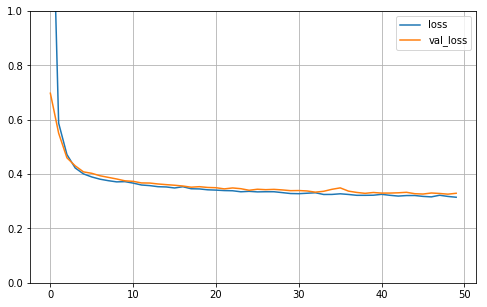

In [60]:
plot_result(history)

### 多输入
上面是相同特征不同处理再concate的wide&deep，如果是特征不一样呢？

In [22]:
input_wide = keras.layers.Input(shape=[5])
input_deep = keras.layers.Input(shape=[6])
hidden_deep1 = keras.layers.Dense(30, activation='relu')(input_deep)
hidden_deep2 = keras.layers.Dense(30, activation='relu')(hidden_deep1)
concat = keras.layers.concatenate([input_wide, hidden_deep2])
output = keras.layers.Dense(1)(concat)

model = keras.models.Model(inputs = [input_wide, input_deep], outputs = [output])
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_15 (Dense)                (None, 30)           210         input_8[0][0]                    
__________________________________________________________________________________________________
input_7 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_16 (Dense)                (None, 30)           930         dense_15[0][0]                   
____________________________________________________________________________________________

In [23]:
x_train_scaled_wide = x_train_scaled[:, :5]
x_train_scaled_deep = x_train_scaled[:, 2:]
x_valid_scaled_wide = x_valid_scaled[:, :5]
x_valid_scaled_deep = x_valid_scaled[:, 2:]
x_test_scaled_wide = x_test_scaled[:, :5]
x_test_scaled_deep = x_test_scaled[:, 2:]
history = model.fit([x_train_scaled_wide,x_train_scaled_deep], 
                    y_train, 
                    validation_data=([x_valid_scaled_wide, x_valid_scaled_deep], y_valid), 
                    epochs=50)

Train on 11610 samples, validate on 3870 samples
Epoch 1/50
11610/11610 [==============================] - 2s 165us/sample - loss: 1.6940 - val_loss: 0.8155
Epoch 2/50
11610/11610 [==============================] - 1s 88us/sample - loss: 0.5902 - val_loss: 0.5505
Epoch 3/50
11610/11610 [==============================] - 1s 83us/sample - loss: 0.4757 - val_loss: 0.4649
Epoch 4/50
11610/11610 [==============================] - 1s 86us/sample - loss: 0.4221 - val_loss: 0.4469
Epoch 5/50
11610/11610 [==============================] - 1s 84us/sample - loss: 0.3837 - val_loss: 0.4228
Epoch 6/50
11610/11610 [==============================] - 1s 87us/sample - loss: 0.3659 - val_loss: 0.3860
Epoch 7/50
11610/11610 [==============================] - 1s 95us/sample - loss: 0.3511 - val_loss: 0.3600
Epoch 8/50
11610/11610 [==============================] - 1s 102us/sample - loss: 0.3457 - val_loss: 0.3496
Epoch 9/50
11610/11610 [==============================] - 1s 94us/sample - loss: 0.3410 - val

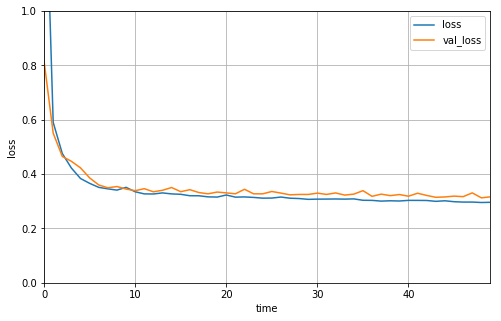

In [24]:
def show_learning_cure(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.ylim(0, 1)
    plt.grid(True)
    plt.xlabel('time')
    plt.ylabel('loss')
    plt.show()
show_learning_cure(history)

### 超参数
超参数往往有四个方法：网格搜索，随机搜索，遗传算法，启发式搜索

In [29]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
train = data.data
target = data.target